In [62]:
import pandas as pd

In [63]:
train=pd.read_csv(r"C:\Users\sande\OneDrive\Documents\Priya\Data_science_Dataset\walmart_sales_forecast\train.csv",na_values=["NA","null"])
features=pd.read_csv(r"C:\Users\sande\OneDrive\Documents\Priya\Data_science_Dataset\walmart_sales_forecast\features.csv",na_values=["NA","null"])
stores=pd.read_csv(r"C:\Users\sande\OneDrive\Documents\Priya\Data_science_Dataset\walmart_sales_forecast\stores.csv",na_values=["NA","null"])

In [64]:
train=train.merge(features,on=["Store","Date"],how="left")
train=train.merge(stores,on=["Store"],how="left")

In [65]:
print((train['IsHoliday_x']==train['IsHoliday_y']).all())

True


In [66]:
#Both train.csv and features.csv contain IsHoliday column,So removing one
train=train.drop('IsHoliday_x',axis=1)

In [44]:
train.isna().sum()

Store                  0
Dept                   0
Date                   0
Weekly_Sales           0
Temperature_x          0
Fuel_Price_x           0
MarkDown1_x       270889
MarkDown2_x       310322
MarkDown3_x       284479
MarkDown4_x       286603
MarkDown5_x       270138
CPI_x                  0
Unemployment_x         0
IsHoliday_y            0
Type_x                 0
Size_x                 0
Temperature_y          0
Fuel_Price_y           0
MarkDown1_y       270889
MarkDown2_y       310322
MarkDown3_y       284479
MarkDown4_y       286603
MarkDown5_y       270138
CPI_y                  0
Unemployment_y         0
IsHoliday              0
Type_y                 0
Size_y                 0
dtype: int64

In [69]:
md_cols=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']

train[md_cols]=train[md_cols].fillna(0)

In [11]:
train.shape

(421570, 16)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday_y   421570 non-null  bool   
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [53]:
#Excluding categorical features and also Store and Dept because they only represent categorical numbers
train_num=train.drop(['Date','Store','Dept','Type'],axis=1)
corr=train_num.corr()['Weekly_Sales'].sort_values()
print(corr)

Unemployment   -0.025864
CPI            -0.020921
Temperature    -0.002312
Fuel_Price     -0.000120
IsHoliday_y     0.012774
MarkDown2       0.020716
MarkDown4       0.037467
MarkDown3       0.038562
MarkDown1       0.047172
MarkDown5       0.050465
Size            0.243828
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64


In [54]:
Type_Mean=train.groupby("Type")["Weekly_Sales"].mean().sort_values()
Type_Mean

Type
C     9519.532538
B    12237.075977
A    20099.568043
Name: Weekly_Sales, dtype: float64

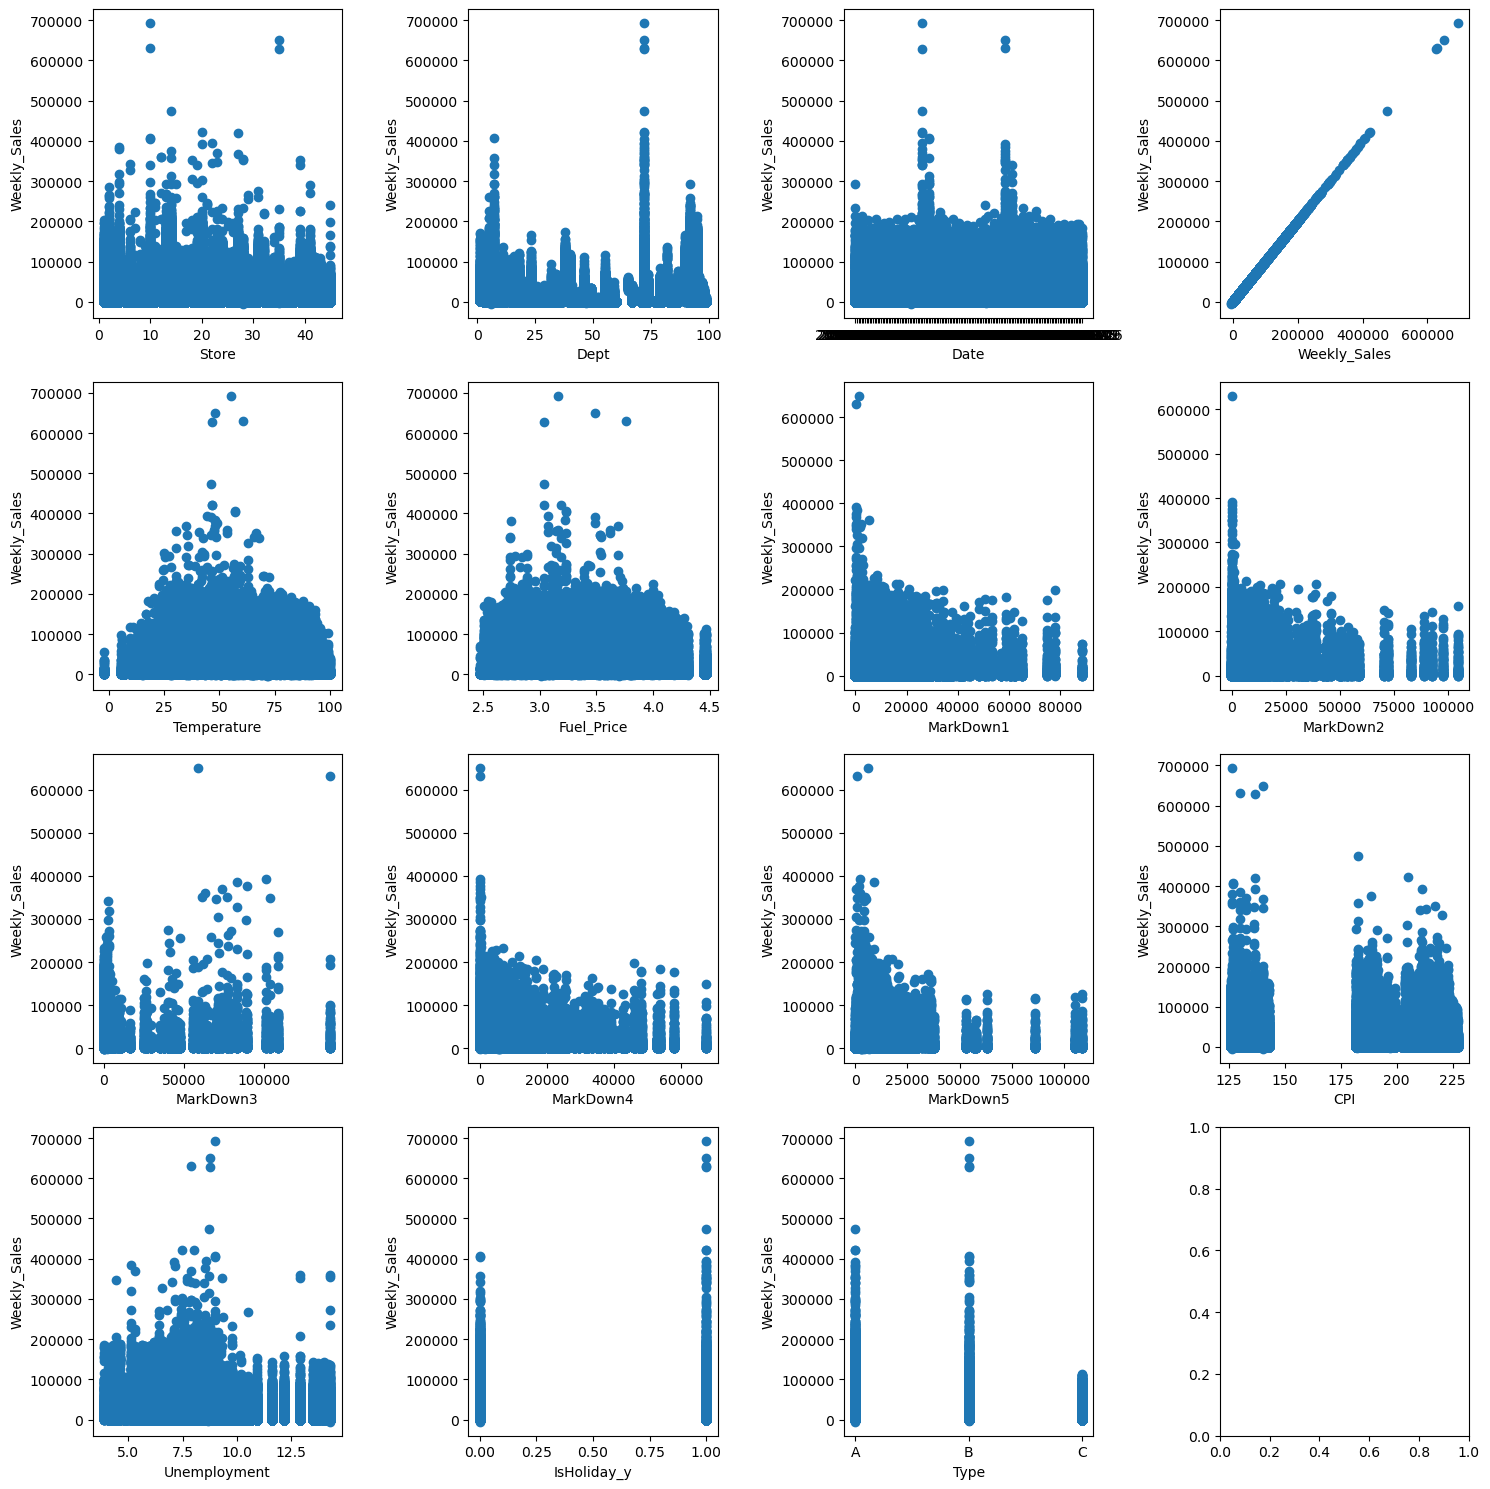

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes = plt.subplots(4,4,figsize=(15,15)) #5*3=15 plots
axes = axes.flatten() #convert 2D to 1D , 15 axes objects

features = train.columns[:-1] #all columns except  MEDV

for i,feature in enumerate(features):
    axes[i].scatter(train[feature],train["Weekly_Sales"])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Weekly_Sales")

plt.tight_layout()
plt.show()



In [70]:
#Convert date to datetime
train['Date']=pd.to_datetime(train['Date'])

#Sort BEFORE creaing lag features
train=train.sort_values(['Store','Dept','Date'])

#Creating lag features based on Store, Dept so that lags are within the same store and department, not mixed with other stores.
train["lag_1"]=train.groupby(["Store","Dept"])["Weekly_Sales"].shift(1) #Last week
train["lag_4"]=train.groupby(["Store","Dept"])["Weekly_Sales"].shift(4) # Monthly trend(4 weeks ago)
train["lag_13"]=train.groupby(["Store","Dept"])["Weekly_Sales"].shift(13) # Quarterly trend
train["lag_52"]=train.groupby(["Store","Dept"])["Weekly_Sales"].shift(52) #Same week last year

train=train.dropna()

In [71]:
#Checking correlations of lag_features with weekly_Sales
print("Lag_1",train["Weekly_Sales"].corr(train["lag_1"]))
print("Lag_4",train["Weekly_Sales"].corr(train["lag_4"]))
print("Lag_13",train["Weekly_Sales"].corr(train["lag_13"]))
print("Lag_52",train["Weekly_Sales"].corr(train["lag_52"]))

Lag_1 0.9599734882363392
Lag_4 0.9472835920155902
Lag_13 0.8988153301226504
Lag_52 0.9809197540986986


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
import numpy as np
from xgboost import XGBRegressor





In [74]:
train['Date'].min()

Timestamp('2011-02-04 00:00:00')

In [75]:
train['Date'].max()

Timestamp('2012-10-26 00:00:00')

In [76]:
train_split=train[train['Date']<"2012-02-04"]
test_split=train[train["Date"]>="2012-02-04"]

#Store,Dept,Type,Date are identifiers, I excluded them to avoid memorization and generalization by model.
#Their specific behavior is already captured in store size and lag_features
cols_to_drop=['Store','Dept','Type','Weekly_Sales','Date']
    
X_train=train_split.drop(cols_to_drop,axis=1)
Y_train=train_split["Weekly_Sales"]

X_test=test_split.drop(cols_to_drop,axis=1)
Y_test=test_split["Weekly_Sales"]

print("Training started")
model=XGBRegressor(n_estimators=1000,learning_rate=0.01,random_state=42,tree_method='hist')
model.fit(X_train,Y_train)

#Evaluation

#Average weekly sales of test data
Average_Weekly_Sales= Y_test.mean()
print("Average Weekly Sales=",Average_Weekly_Sales)

Y_test_pred = model.predict(X_test)
Y_train_pred=model.predict(X_train)

test_r2 = r2_score(Y_test,Y_test_pred)
print("Test_r2=",test_r2)

train_r2=r2_score(Y_train,Y_train_pred)
print("Train r2=",train_r2)

mae=mean_absolute_error(Y_test,Y_test_pred)
print("mae:",mae)
print("MAE based relative error",(mae/Average_Weekly_Sales)*100)

mse = mean_squared_error(Y_test,Y_test_pred)
print("mse=",mse)

rmse=np.sqrt(mse)
print("rmse=",rmse)

rmse=np.sqrt(mse)
print("rmse=:",rmse)
print("RMSE based relative error",(rmse/Average_Weekly_Sales)*100)


Training started
Average Weekly Sales= 16181.156471201532
Test_r2= 0.9810213452575977
Train r2= 0.9864756947845005
mae: 1384.9933316582142
MAE based relative error 8.559297563948293
mse= 9401058.900062824
rmse= 3066.114626047569
rmse=: 3066.114626047569
RMSE based relative error 18.948674227979296


In [77]:
train_split=train[train['Date']<"2012-02-04"]
test_split=train[train["Date"]>="2012-02-04"]

#Store,Dept,Type,Date are identifiers, I excluded them to avoid memorization and generalization by model.
#Their specific behavior is already captured in store size and lag_features
cols_to_drop=['Store','Dept','Type','Weekly_Sales','Date']
    
X_train=train_split.drop(cols_to_drop,axis=1)
Y_train=train_split["Weekly_Sales"]

X_test=test_split.drop(cols_to_drop,axis=1)
Y_test=test_split["Weekly_Sales"]

print("Training started")
model=RandomForestRegressor(n_estimators=50,random_state=42,n_jobs=-1)
model.fit(X_train,Y_train)

#Evaluation

#Average weekly sales of test data
Average_Weekly_Sales= Y_test.mean()
print("Average Weekly Sales=",Average_Weekly_Sales)

Y_test_pred = model.predict(X_test)
Y_train_pred=model.predict(X_train)

test_r2 = r2_score(Y_test,Y_test_pred)
print("Test_r2=",test_r2)

train_r2=r2_score(Y_train,Y_train_pred)
print("Train r2=",train_r2)

mae=mean_absolute_error(Y_test,Y_test_pred)
print("mae:",mae)
print("MAE based relative error", (mae/Average_Weekly_Sales)*100)

mse = mean_squared_error(Y_test,Y_test_pred)
print("mse=",mse)

rmse=np.sqrt(mse)
print("rmse=",rmse)

rmse=np.sqrt(mse)
print("rmse=:",rmse)
print("RMSE based relative error", (rmse/Average_Weekly_Sales)*100)



Training started
Average Weekly Sales= 16181.156471201532
Test_r2= 0.9816290815665565
Train r2= 0.997365740004127
mae: 1382.4327197124232
MAE based relative error 8.543472910436362
mse= 9100017.287062505
rmse= 3016.62349110102
rmse=: 3016.62349110102
RMSE based relative error 18.64281762845484
